<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/MMU_logo.png" width=150 align="right"/>
<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/python_logo.png" width="150" align="right"/>

# Fractals

---
<table align="center">
    <tr>
        <td align="left">
            <span style="font-weight:normal">
                <b>Dr Jon Shiach</b> <br><br>
                Senior Lecturer <br>
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br> 
                Email: <a href="mailto:j.shiach@mmu.ac.uk">j.shiach@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" height="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/jon_shiach.jpeg">
        </td>
        <td align="left">
            <span style="font-weight:normal">
                <b>Dr Stephen Lynch</b> <br><br> 
                Reader <br> 
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br>
                Email: <a href="mailto:s.lynch@mmu.ac.uk">s.lynch@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" height="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/stephen_lynch.jpeg">
        </td>
        <td>
            <span style="font-weight:normal">
                <b>Dr Killian O'Brien</b> <br><br>
                Senior Lecturer <br>
                Department of Computing and Mathematics<br>
                Manchester Metropolitan University<br> 
                Email: <a href="mailto:k.m.obrien@mmu.ac.uk">k.m.obrien@mmu.ac.uk</a>
            </span>
        </td>
        <td>
            <img width="100" height="100" src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/killian_obrien.jpeg">
        </td>
    </tr>
</table>

---

## Introduction

[**Fractals**](https://en.wikipedia.org/wiki/Fractal) are complex and beautiful shapes that are generated using a simple set of mathematical rules. Fractals often exhibit a complicated structure which is repeated at different scales throughout the fractal, this means that if we zoom in on a portion of the fractal it will resemble the fractal itself. Mathematicians refer to this property as **self similarity** and can be seen in nature, some examples of which are shown below.

| <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/cactus.jpeg" width="300" height="200"/> | <img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/lightning.jpeg" width="300" height="200"/> |<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/snowflake.jpeg" width="300" height="200"/> |<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/lungs.jpeg" width="300" height="200"/> |
|:--:|:--:|:--:|:--:|
| Cactus | Electricity | Snowflake | Lungs |
         
This Jupyter notebook will introduce you to fractals and how we can draw fractals using [Python](https://www.python.org/). To be able to follow the content of this notebook you just need an understanding of basic trigonometry, geometry and complex numbers (which are covered here). You will be asked to enter Python programs into code cells and run the programs. Typing the programs into the code cells will help you to understand what the program is doing, but if this gets tedious you can also copy and paste the programs into the code cells. 

### Contents

1. [The Koch Curve](#The-Koch-Curve)
1. [The Sierpinski Triangle](#The-Sierpinski-Triangle)
1. [Fractal Trees](#Fractal-Trees)
1. [The Mandelbrot Set](#The-Mandlebrot-Set)

### Jupyter notebooks

Jupyter notebooks are documents that combine text and Python code which allow readable documents such as this one to be created that contain executable code used to perform calculations. To run code in a notebook simply click on the code and then on the run button, or alternatively, press the **ctrl + enter** keys at the same time. Since we will be using commands to perform calculations and produce plots of fractals we need to import some commands to help us to do this. Run the code below to import the commands.

In [ ]:
from numpy import *
import matplotlib.pyplot as plt
from matplotlib import cm, colors

Now we can perform some calculations. The Python code below calculates the length of the side of the right-angled triangle opposite the angle $\theta = 0.6435$ and with a hypotenuse of length 5 and prints the result. Note how the equation $\textsf{opposite}=5\sin(0.6435)$  is entered in a similar way to how we write it on a piece of paper. Can you add a couple of lines of code to calculate the length of the adjacent side as well?

In [ ]:
opposite = 5 * sin(0.6435)
print(opposite)

---
## The Koch Curve

The [**Koch Curve**](https://en.wikipedia.org/wiki/Koch_snowflake) first discovered by Swedish mathematician Helge von Koch is one of the first examples of a fractal. To draw a Koch curve we begin with a straight line of length $L$ (the initial starting point is known as stage 0). We then remove the middle third of the line and replace it with two lines of length $\frac{L}{3}$ which form two sides of an equilateral triangle. So after the first time we do this (stage 1) we have four lines each of length $\frac{L}{3}$. We then repeat the process for each of the new lines.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/koch_curve.svg" align=center width=600>

The Python program below defines a function called `KochCurve` which uses inputs of the starting co-ordinates `x1` and `y1`, the length of the line `L`, the angle of the line `angle` and the number of stages `n`. Enter this program into the code cell below and run it.

```Python
def KochCurve(x1, y1, L, angle, n):
    """
    This function plots the Koch curve up to stage n
    """
    
    # Calculate the end point of the current line
    x2 = x1 + L * cos(radians(angle))
    y2 = y1 + L * sin(radians(angle))
    
    if n == 0:
        # Plot the current line
        plt.plot([x1, x2], [y1, y2], "blue")
    else:
        # Repeat for each of the four line segments
        x1, y1 = KochCurve(x1, y1, L / 3, angle, n - 1)
        x1, y1 = KochCurve(x1, y1, L / 3, angle + 60, n - 1)
        x1, y1 = KochCurve(x1, y1, L / 3, angle - 60, n - 1)
        x1, y1 = KochCurve(x1, y1, L / 3, angle, n - 1)

    return x2, y2


# Setup plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.set_aspect("equal")

# Generate Koch curve (inputs: x1, y1, length of stage 0, angle of stage 0, number of stages)
x1, y1 = KochCurve(0, 0, 1, 0, 4)
```

In [ ]:
# This is a code cell which we can write Python programs. 
# Enter the program here and then run the code cell by clicking on 'Run' or press ctrl and enter.

If everything has gone well you should see the Koch curve drawn to stage 2. If it hasn't worked, double check that you haven't made a mistake in typing out the Python code (mistakes are very common in programming and are called bugs, it is rare that a programmer will write a program free of bugs on the first go). Can you edit your program to draw the Koch curve up to stage 4?

### The Koch snowflake

The **Koch snowflake** is a fractal that is constructed using a Koch curve to each side of an equilateral triangle.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/koch_snowflake.svg" align=center width=400>

We can use our `KochCurve` function that we defined above to draw a Koch snowflake. Enter the following program into the code cell below and run it.

```Python
def KochSnowflake(n):
    """
    This function plots the Koch snowflake up to stage n
    """
    x1, y1 = KochCurve(0, 0, 1, 0, n)
    x1, y1 = KochCurve(x1, y1, 1, 240, n)
    x1, y1 = KochCurve(x1, y1, 1, 120, n)


# Setup plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.set_aspect("equal")

# Generate Koch snowflake (input: number of stages)
KochSnowflake(4)
```

---
### Activity 1: The Koch square

Write a Python program to construct a **Koch Square** which is where each line on a square has the middle third removed and replaced by three lines which form three sides of a square with side length one third of that of the line we started with. You can copy and paste your program for drawing the Koch curve and the Koch snowflake to help you.

---
## The Sierpinski Triangle

The [**Sierpinski Triangle**](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle) was discovered by Polish mathematician Wacław Sierpiński and is drawn by starting with a filled equilateral triangle at stage 0. We then remove the inverted equilateral triangle with the vertices at the midpoints along the edges of the triangle. We repeat this for each new triangle.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/sierpinski_triangle.svg" align=center width=400>

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/sierpinski_triangle_calculation.svg" align=right width=200>

If the initial triangle has side lengths 1 then the co-ordinates of the three vertices anti-clockwise starting at the bottom-left vertex are $(0, 0)$, $(1, 0)$ and $( \frac{1}{2}, \frac{\sqrt{3}}{2} )$. The vertices of the inverted triangle are labeled $(x_1, y_1)$, $(x_2, y_2)$ and $(x_3, y_3)$ going anti-clockwise starting at the bottom vertex as shown in the diagram on the right. To calculate these co-ordinates we use the co-ordinates of the bottom-left vertex $(x, y)$ and the side length $L$ to give

\begin{align*}
    (x_1, y_1) &= \left(x + \frac{1}{2}L, y\right), &
    (x_2, y_2) &= \left(x + \frac{3}{4}L, y + \frac{\sqrt{3}}{4}L\right), &
    (x_3, y_3) &= \left(x + \frac{1}{4}L, y + \frac{\sqrt{3}}{4}L\right).
\end{align*}

The three smaller triangles are defined by the co-ordinates of the bottom-left vertex which are $(x, y)$, $(x_1, y_1)$ and $(x_3, y_3)$ and the side length $\frac{L}{3}$. The Python program below plots the Sierpinski triangle to stage 2. Enter this program into the code cell below and run it. Edit the program to generate the Sierpinski triangle using more stages.  

```Python
def RemoveMiddleTriangle(x, y, L, n):
    """
    This function removes the middle triangle in an equilateral triangle with
    the bottom-left vertex at (x, y) and side length L.
    """
    # Calculate the vertex co-ordinates of the inverted triangle
    x1 = x + 1/2 * L
    x2 = x + 3/4 * L
    x3 = x + 1/4 * L
    y1 = y
    y2 = y + sqrt(3)/4 * L
    y3 = y2
    
    # Plot the inverted triangle
    plt.fill([x1, x2, x3], [y1, y2, y3], "white")  

    if n > 0:
        # Repeat for each of the three sub-triangles
        RemoveMiddleTriangle(x, y, L / 2, n - 1)    # bottom left triangle
        RemoveMiddleTriangle(x1, y1, L / 2, n - 1)  # bottom right triangle
        RemoveMiddleTriangle(x3, y3, L / 2, n - 1)  # top triangle


def SierpinskiTriangle(n):
    """
    This function plots the Sierpinski Triangle up to stage n.
    """ 
    # Plot the stage 0 triangle
    plt.fill([0, 1, 1/2], [0, 0, sqrt(3) / 2], "blue")

    # Remove the middle triangles
    RemoveMiddleTriangle(0, 0, 1, n - 1)


# Setup plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.set_aspect("equal")

# Generate the Sierpinski triangle (input: number of stages)
SierpinskiTriangle(2)
```

---
### Activity 2: The Sierpinski carpet

The [**Sierpinski carpet**](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_carpet) is drawn by starting with a filled square at stage 0. We divide the square into 9 squares and remove the centre square. We repeat this step for each of the 8 filled squares. Write a Python program in the code cell below that draws the Sierpinski carpet.

<img src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/sierpinski_carpet.svg" align=center width=400>

---
### The Chaos Game

Another way of drawing the Sierpinski triangle is using the chaos game which uses probability. The rules of the game are as follows: starting at a point with co-ordinates $(0, 0)$ we randomly choose one of the three vertices of the triangle. We find the point which is halfway between our current point and the chosen vertex and mark the position of this new point. If we repeat this lots of times and we should see the Sierpinski triangle appear.

If $(x_i, y_i)$ are the co-ordinates of the current point then the co-ordinates of the next point $(x_{i+1}, y_{i+1})$ are calculated using:

\begin{align*}
    \textsf{bottom-left vertex:} && x_{i+1} &= \frac{x_i}{2}, & y_{i+1} &= \frac{y_i}{2}, \\
    \textsf{bottom-right vertex:} && x_{i+1} &= \frac{x_i}{2} + \frac{1}{2}, & y_{i+1} &= \frac{y_i}{2}, \\
    \textsf{top vertex:} && x_{i+1} &= \frac{x_i}{2} + \frac{1}{4}, & y_{i+1} &= \frac{y_i}{2} + \frac{\sqrt{3}}{4}.
\end{align*}

The Python program below uses the chaos game to draw the Sierpinski triangle. Enter this into the code cell below and run it. Increase the number of points drawn to improve the image of the fractal.

```Python
def ChaosGame(n):
    """
    Calculates the x and y co-ordinates for the Sierpinski triangle
    using the chaos game
    """
    x, y = zeros(n), zeros(n)
    for i in range(n - 1):
        r = random.rand() # generate a random number between 0 and 1
        if r < 0.33:
            x[i+1] = x[i] / 2              # move halfway towards bottom-left vertex
            y[i+1] = y[i] / 2
        elif r < 0.67:
            x[i+1] = x[i] / 2 + 1/2        # move halfway towards bottom-right vertex
            y[i+1] = y[i] / 2
        else:
            x[i+1] = x[i] / 2 + 1/4        # move halfway towards top vertex
            y[i+1] = y[i] / 2 + sqrt(3)/4
            
    # Plot points
    plt.scatter(x, y, c="blue", s=1)
    plt.title(f"{n} points")
    

# Setup plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.set_aspect("equal")

# Generate Koch curve (input: number of points)
ChaosGame(100)
```

---
## Fractal Trees

If you look at trees in nature you may now start to notice that they also have a fractal structure. A main trunk grows upwards until a point where it splits into two or more branches which will also grow for a bit before splitting again. This behaviour continues into the smallest branches begin to sprout leaves. We can attempt to draw a fractal that resembles a tree by doing something similar. 

The Python program below draws a fractal tree up to stage 4. Each branch of this tree splits into two smaller branches, the first branch is 50% of the length of the previous branch and grows at an angle 60 degrees to the left, the second branch is 70% the length of the previous branch and grows at an angle 30 degrees to the right. Enter this program into the code cell below and run it. If we increase the number of stages we get a more detailed tree, although we wouldn't recommend going higher than stage 10 as this will take several minutes to run!

```Python
def FractalTree(x1, y1, L, angle, n):
    """
    This function plots a fractal tree up to stage n
    """
    # Branch colour and width
    if L < 0.2:
        colour = "green"
    else:
        colour = "brown"    
    width = 10 * L

    # Calculate the end point of the current branch
    x2 = x1 + L * cos(radians(angle))
    y2 = y1 + L * sin(radians(angle))

    if n == 0:
        # Plot current branch
        plt.plot([x1, x2], [y1, y2], c=colour, lw=width)
    else:
        # Add branches
        FractalTree(x1, y1, L, angle, n - 1)             # main branch
        FractalTree(x2, y2, 0.5 * L, angle + 60, n - 1)  # first branch
        FractalTree(x2, y2, 0.7 * L, angle - 30, n - 1)  # second branch
        
    return x1, y1


fig, ax = plt.subplots(figsize=(6, 6))
ax.axis("off")
ax.set_aspect("equal")

# Generate fractal tree (inputs: x1, x2, length of stage 0 branch, angle of stage 0 branch, number of stages)
x1, y1 = FractalTree(0, 0, 1, 90, 2)
```

---
### Activity 3: Fractal tree

Write a Python program that draws a fractal tree where the branches split into three each time with the first branch growing straight up, the second branch growing at an angle of 30 degrees to the left and the third branch 30 degrees to the right and each sub-branch is 60% the length of the previous branch.

---
## The Mandlebrot Set

Perhaps the most famous and beautiful fractal is the [**Mandelbrot set**](https://en.wikipedia.org/wiki/Mandelbrot_set) which was discovered by Polish mathematician Benoit Mandelbrot who was the one who first coined the name *fractal*. The Mandelbrot set is generated by using a very simple formula that is applied to complex numbers, so before we look at how it is generated we are first going to introduce you to complex numbers.

### Complex numbers

<img align=right src="https://raw.githubusercontent.com/jonshiach/Outreach/main/Fractals/Images/complex_plane.svg" align=center width=300>

Despite their name, complex numbers are actually quite simple. A complex number is a number that is expressed using two parts: a **real part** and an **imaginary part**. The real part is just a real number, the imaginary part is the **imaginary number** $i = \sqrt{-1}$ multiplied by a real number. For example, the complex number $z = x + yi$ has a real part $x$ and an imaginary part $y$. We can think of a complex number as being a point on the complex plane where the horizontal axis represents the real part and the vertical axis represents the imaginary part. The distance of the point from the origin is known as the **absolute value** (or modulus) of $z$ and is denoted by $|z|$. Using Pythagoras' theorem we calculate the absolute value of a complex number using

\begin{align*}
    |z| = \sqrt{x^2 + y^2}.
\end{align*}

To add two complex numbers we simply add the real parts and the imaginary parts separately, for example

\begin{align*}
    (x + yi) + (u + vi) = (x + u) + (y + v)i.
\end{align*}

To multiply of two complex numbers we multiply out two bracketed expressions using the FOIL technique (first, outside, inside last), for example

\begin{align*}
    (x + yi) (u + vi) &= xu + xvi + yui + yvi^2 = (xu - yv) + (xv + yu)i.
\end{align*}

Since squaring a number is multiplying a number by itself the square of a complex number is

\begin{align*}
    (x + yi)^2 = (x + yi)(x + yi) = x^2 - y^2 + 2xyi.
\end{align*}


### Generating the Mandelbrot set

The Mandelbrot set is generated by the simple equation 

$$z_{n+1} = z_n^2 + c,$$

where $z_n$ is the current number in a sequence of numbers, $z_{n+1}$ is the next number, $z_0=0$ is the starting number and $c = x + yi$ is some complex number. The first time we calculate this equation we have $z_1 = c$, the second time we have $z_2 = c^2 + c$, the third time we have $z_3 = (c^2 + c)^2 + c$ and so on. This method of repeating a calculation the same equation is known as **iteration**. We continue to iterate this equation until either the absolute value of $z_n$ is greater than 2 or a maximum number of iterations has been reached. If $|z_n|>2$ then we say that the number $c$ has *escaped* and is not a member of the Mandelbrot set, else if at the end of the iterations the absolute value of $z_n$ is still less than 2 we say the number $c$ is a member of the Mandelbrot set and we mark this point on the complex plane. If we repeat this for other points in the complex plane a beautifully complex shape starts to appear.

For example consider the number $c = 1$,  the iterations are:

\begin{align*}
    z_1 &= 1, & |z_1| &= 1, \\
    z_2 &= 1^2 + 1 = 2, & |z_2| &= 2, \\
    z_3 &= 2^2 + 1 = 5, & |z_3| &= 5.
\end{align*}

So after 3 iterations the number $c=1$ has escaped so is not a member of the Mandelbrot set. Let's try the number $c = i$:

\begin{align*}
    z_1 &= i, & |z_1| &= 1, \\
    z_2 &= i^2 + i = -1 + i, & |z_2| &\approx 1.41, \\
    z_3 &= (-1 + i)^2 + i = -i, & |z_3| &= 1, \\
    z_4 &= (-i)^2 + i = -1 + i, & |z_4| &\approx 1.41.
\end{align*}

Here $z_4=z_2$ so the values of $z_n$ will cycle between $-1+i$ and $-i$. This means $|z_i|$ will always be less than 2 so $c = i$ is a member of the Mandelbrot set.

The Python program below draws the Mandelbrot set for a region on the complex plane defined by the co-ordinates of the bottom-left and top-right corners (`x1`, `y1`) and (`x2`, `y2`) with iterations ceasing when $n$ is equal to the maximum number of iterations `maxiter`. Enter this program into the code cell below and run it.

```Python
def Mandelbrot(c, maxiter):
    """
    This function calculates the Mandelbrot iterations for a starting
    number c and outputs the escape count and final value.
    """
    z = 0
    for n in range(maxiter):
        z = z ** 2 + c
        if abs(z) > 2:
            break

    return n + 1, z


def PlotMandelbrot(x1, y1, x2, y2, maxiter):
    """
    This function plots the Mandelbrot set for the region bounded by 
    bottom-left and top-right co-ordinates (x1, y1), (x2, y2).
    """
    np = 400                                # number of horizontal points
    aspect = (y2 - y1) / (x2 - x1)          # height-to-width aspect ratio   
    x = linspace(x1, x2, np)                # real values
    y = linspace(y2, y1, int(np * aspect))  # imaginary values
    N = zeros((len(x), len(y)))             # escape count matrix

    # Calculate the escape count for each point in the region
    for i in range(len(x)):
        for j in range(len(y)):
            N[i, j], z = Mandelbrot(x[i] + y[j] * 1j, maxiter)

    # Find which points have yet to escape
    N = N == maxiter

    # Plot the Mandelbrot set
    fig, ax = plt.subplots(figsize=(8, 8 * aspect))
    plt.imshow(N.T, extent=[x1, x2, y1, y2], cmap="binary")
    plt.xlabel("real(c)")
    plt.ylabel("imag(c)")


# Plot the mandelbrot set (inputs: x1, y1, x2, y2, number of iterations)
PlotMandelbrot(-2, -1.25, 0.5, 1.25, 30)
```

### Adding colour to the Mandelbrot set

Some numbers which are not members of the Mandelbrot set take longer to escape than others. We can represent this on our Mandelbrot set by plotting each point using a colour which depends on its escape count. Run the program below to plot the Mandelbrot set in colour.

In [ ]:
def PlotMandelbrotColour(x1, y1, x2, y2, maxiter):
    """
    This function plots the Mandelbrot set in colour for the region bounded 
    by bottom-left and top-right co-ordinates (x1, y1), (x2, y2).
    """
    np = 400                                # number of horizontal points
    aspect = (y2 - y1) / (x2 - x1)          # height-to-width aspect ratio   
    x = linspace(x1, x2, np)                # x (real) values
    y = linspace(y2, y1, int(np * aspect))  # y (imaginary) values
    N = zeros((len(x), len(y)))             # escape count matrix
    
    # Calculate the escape count for each point the region
    for i in range(len(x)):
        for j in range(len(y)):
            N[i,j], z = Mandelbrot(x[i] + y[j] * 1j, maxiter)
            
            # Smooth the escape count
            if N[i,j] < maxiter:
                N[i,j] += 1 - log(log2(abs(z)))
    
    # Define colormap
    jet = cm.get_cmap("jet", 256)              # get the colormap
    colours = jet(linspace(0, 1, 256))         # get the colours from the colormap
    colours = vstack((colours, [0, 0, 0, 1]))  # add a black layer to the colormap
    cmap = colors.ListedColormap(colours)      # save colormap
    
    # Plot the Mandelbrot set
    fig, ax = plt.subplots(figsize=(8, 8 * aspect))
    plt.imshow(N.T, extent=[x1, x2, y1, y2], cmap=cmap)
    plt.xlabel("real(c)")
    plt.ylabel("imag(c)")
    
    
# Plot the mandelbrot set (inputs: x1, y1, x2, y2, number of iterations)
PlotMandelbrotColour(-2, -1.25, 0.5, 1.25, 50)

---
### Activity 4: Exploring the Mandelbrot set

The amazing thing about the Mandelbrot set is that when we zoom in to areas surrounding the points in the Mandelbrot set we see that these form complicated and beautiful shapes. There are even small Mandelbrot sets found which we can also zoom into so the Mandelbrot set has the self-similarity property found in other fractals. The code in the code cell below plots the region of the Mandelbrot set defined by bottom-left and top-right co-ordinates (-1.05, 0.25) and (-0.95, 0.35) and calculated for 200 iterations. Explore the Mandelbrot set by changing these values (increase `maxiter` to get more detail).

In [ ]:
# Plot the mandelbrot set (inputs: x1, y1, x2, y2, maxiter)
PlotMandelbrotColour(-1.05, 0.25, -0.95, 0.35, 200)

### Zooming into the Mandlebrot set

The video below was created by YouTube creator [Maths Town](https://www.youtube.com/channel/UC6qEdtxp_IAaVrNAHUIhHbQ) and zooms into the Mandelbrot set showing the infinite complexity of the fractal.

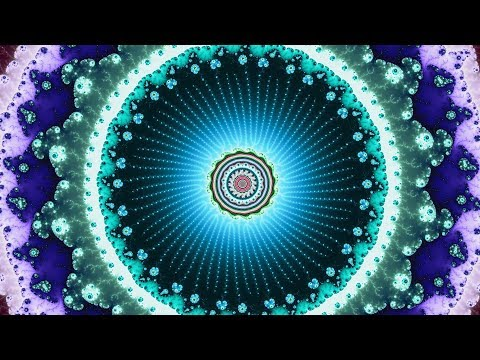

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('pCpLWbHVNhk', width=500, height=300)

---
## Useful Links

If you would like to further explore Python and fractals you may find the following links useful:

- [Anaconda](https://www.anaconda.com/products/distribution) - a suite of software tools that includes Jupyter Notebook and Python. Download and install on your computer to write and run Jupyter notebooks
- [Google Colab](https://colab.research.google.com/) - run Jupyter notebooks in the cloud using Google Colab (you will need to have a Google account to do this)
- [Fractals](https://en.wikipedia.org/wiki/Fractal)
- [Koch snowflake](https://en.wikipedia.org/wiki/Koch_snowflake)
- [Sierpinski Triangle](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle)
- [Sierpinski carpet](https://en.wikipedia.org/wiki/Sierpi%C5%84ski_carpet)
- [Fractal tree](https://en.wikipedia.org/wiki/Fractal_canopy)
- [Mandelbrot set](https://en.wikipedia.org/wiki/Mandelbrot_set)

&copy; Dr Jon Shiach 2022